In [1]:
setwd("???)   

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected INCOMPLETE_STRING
1: setwd("???)   
          ^


In [3]:
df <- read.csv("../anova2_data/pen.csv", sep=",", header=T, fileEncoding="UTF-8-BOM")
df

Response,Detergent,Pen
0.97,1,1
0.77,1,2
0.67,1,3
0.48,2,1
0.14,2,2
0.39,2,3
0.48,3,1
0.22,3,2
0.57,3,3
0.46,4,1


In [4]:
detergentFactor <- factor(df$Detergent)
penFactor <- factor(df$Pen)
anovaResult <- aov(df$Response ~ detergentFactor + penFactor, data=df)
summary(anovaResult)

                Df Sum Sq Mean Sq F value Pr(>F)   
detergentFactor  3 0.4797 0.15990  11.055 0.0074 **
penFactor        2 0.1282 0.06411   4.432 0.0658 . 
Residuals        6 0.0868 0.01446                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [5]:
qf(0.05, 2, 6, lower.tail=F)   # pen

[1] 5.143253

In [6]:
qf(0.05, 3, 6, lower.tail=F)   # detergent

[1] 4.757063

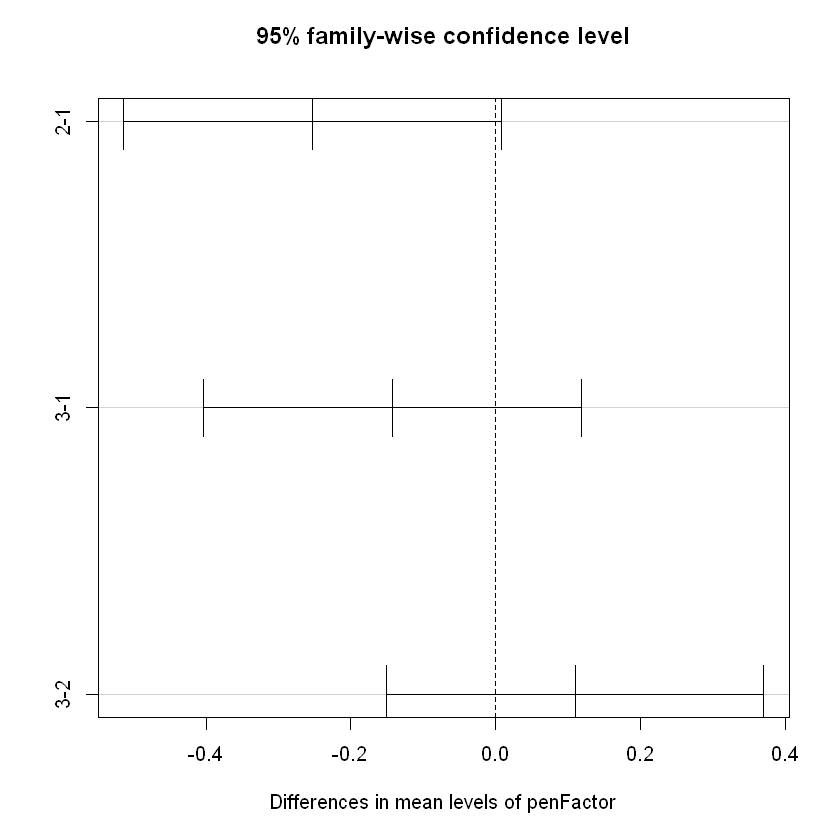

In [7]:
tk1 <- TukeyHSD(anovaResult, 'penFactor', conf.level = 0.95)
plot(tk1)

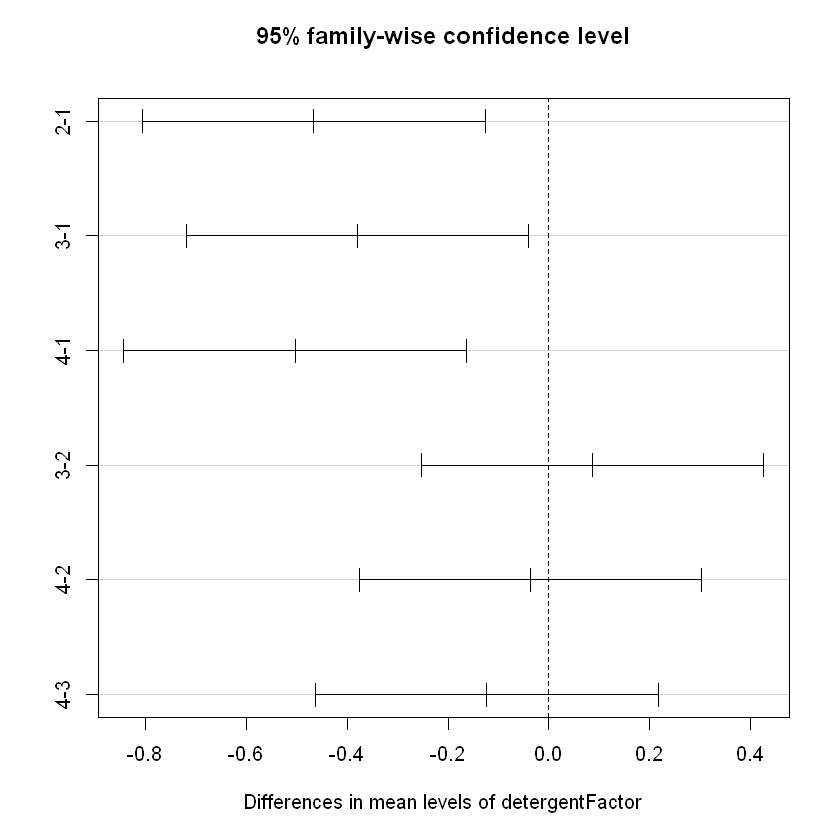

In [8]:
tk2 <- TukeyHSD(anovaResult, 'detergentFactor', conf.level = 0.95)
plot(tk2)

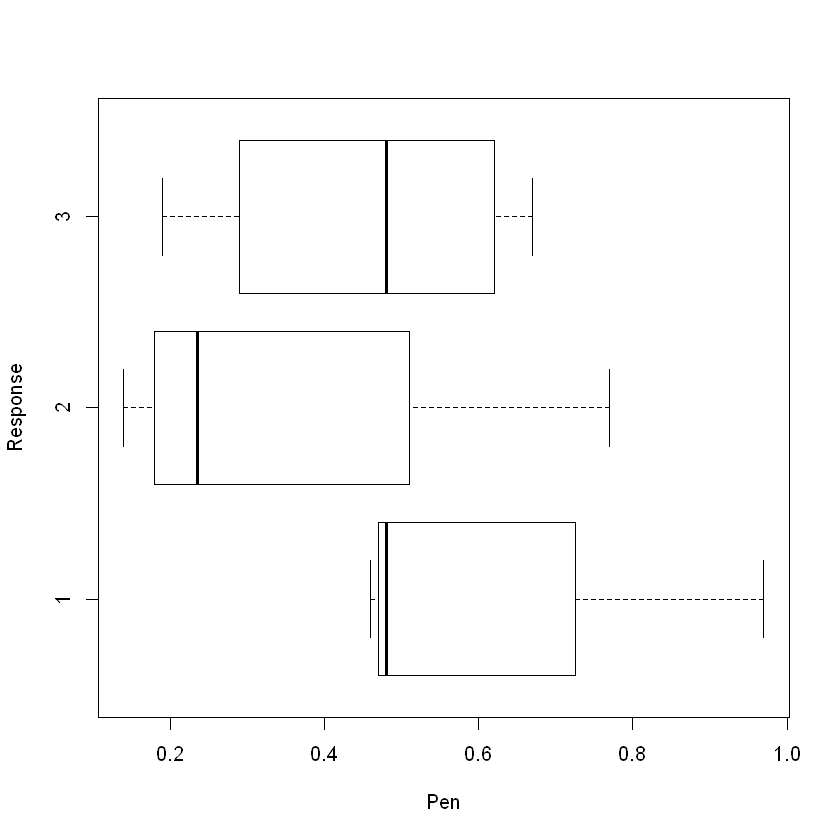

In [9]:
boxplot(df$Response~df$Pen, horizontal=T,xlab="Pen", ylab="Response")

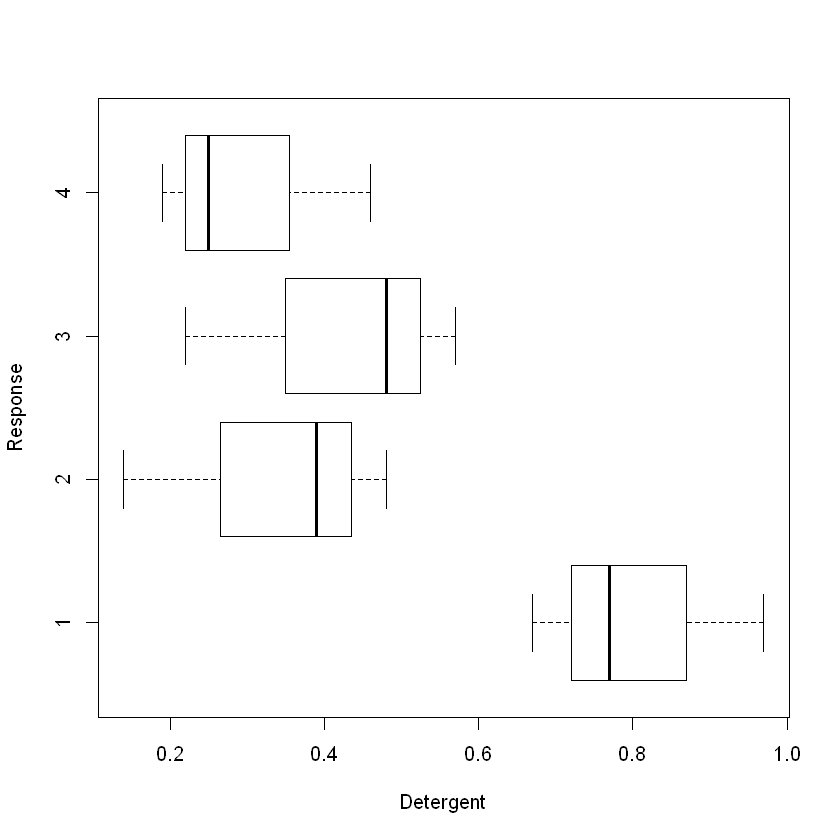

In [10]:
boxplot(df$Response~df$Detergent, horizontal=T, xlab="Detergent", ylab="Response")